In [1]:
from IPython.core.display import display, HTML 

import mlrose_hiive
import numpy as np
import logging
import networkx as nx
import matplotlib.pyplot as plt
import string

import time

from ast import literal_eval

from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import NNGSRunner

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

C:\Users\jmaal\AppData\Local\Temp\ipykernel_10420\4061045585.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
# helper funcs

def percent_diff(x,y):
    return (2*(x-y))/(x+y)

def fitness_mean(runs_arr):
    # extract fitness values
    fitness_list = []
    for run in runs_arr:
        fitness = run['Fitness'].min()
        fitness_list.append(fitness)
    return np.mean(fitness_list)

def fitness_var(runs_arr):
    # extract fitness values
    fitness_list = []
    for run in runs_arr:
        fitness = run['Fitness'].min()
        fitness_list.append(fitness)
    return np.var(fitness_list)

def fitness_std(runs_arr):
    # extract fitness values
    fitness_list = []
    for run in runs_arr:
        fitness = run['Fitness'].min()
        fitness_list.append(fitness)
    return np.std(fitness_list)

def feval_mean(runs_arr):
    # extract fitness values
    feval_list = []
    for run in runs_arr:
        feval = run['FEvals'].max()
        feval_list.append(feval)
    return np.mean(feval_list)

def feval_var(runs_arr):
    # extract fitness values
    feval_list = []
    for run in runs_arr:
        feval = run['FEvals'].max()
        feval_list.append(feval)
    return np.var(feval_list)

def feval_std(runs_arr):
    # extract fitness values
    feval_list = []
    for run in runs_arr:
        feval = run['FEvals'].max()
        feval_list.append(feval)
    return np.std(feval_list)


def time_mean(runs_arr):
    # extract fitness values
    time_list = []
    for run in runs_arr:
        time = run['Time'].max()
        time_list.append(time)
    return np.mean(time_list)

def time_var(runs_arr):
    # extract fitness values
    time_list = []
    for run in runs_arr:
        time = run['Time'].max()
        time_list.append(time)
    return np.var(time_list)

def time_std(runs_arr):
    # extract fitness values
    time_list = []
    for run in runs_arr:
        time = run['Time'].max()
        time_list.append(time)
    return np.std(time_list)

# given an array of runs, print mean and var for each size
def print_stats(runs_2d):
    for runs_arr in runs_2d:
        print("***RUN STATS***")
        print("mean fitness:",fitness_mean(runs_arr))
        print("VAR fitness:",fitness_var(runs_arr))
        print("STD fitness:",fitness_std(runs_arr))
        print("mean feval:", feval_mean(runs_arr))
        print("VAR feval:", feval_var(runs_arr))
        print("STD feval:", feval_std(runs_arr))
        print("mean runtime:", time_mean(runs_arr))
        print("var runtime:", time_var(runs_arr))
        print("STD runtime:", time_std(runs_arr))

def sa_params(runs_arr):
    print("***SA PARAMS***")
    for run in runs_arr:
        print("best params")
        print("Temp:", run.iloc[0]['Temperature'])

def ga_params(runs_arr):
    print("***GA PARAMS***")
    for run in runs_arr:
        print("best params")
        print("Population size:", run.iloc[0]['Population Size'])
        print("Mutation rate:", run.iloc[0]['Mutation Rate'])
        

def mmc_params(runs_arr):
    print("***MMC PARAMS***")
    for run in runs_arr:
        print("best params")
        print("Population size:", run.iloc[0]['Population Size'])
        print("Keep Percent:", run.iloc[0]['Keep Percent'])

In [3]:
# Data

data = load_breast_cancer()

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, 
                                                    test_size = 0.2, 
                                                    random_state = np.random.randint(0,1000))

# Normalize feature data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One hot encode target values
one_hot = OneHotEncoder()

y_train_hot = one_hot.fit_transform(y_train.reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(y_test.reshape(-1, 1)).todense()

In [76]:
# RHC
# test for restarts = [10,25,50]
# max attempts = 10

restart_list = [10,25,50]
rhc_runs1 = [[] for i in range(len(restart_list))]
rhc_curves1 = [[] for i in range(len(restart_list))]
rhc_test1 = [[] for i in range(len(restart_list))]



for i in range(3):  
    for k in range(len(restart_list)):
        grid_search_parameters = {
            'max_iters': [1000],                          # nn params
            'learning_rate': [1e-3],                       # nn params
            'activation': [mlrose_hiive.relu],            # nn params
            'restarts': [restart_list[k]],                             # rhc params
        }   

        nnr1 = NNGSRunner(
            x_train=X_train_scaled,
            y_train=y_train_hot,
            x_test=X_test_scaled,
            y_test=y_test_hot,
            experiment_name='nn_test_rhc',
            algorithm=mlrose_hiive.algorithms.rhc.random_hill_climb,
            grid_search_parameters=grid_search_parameters,
            iteration_list=[1, 10, 50, 100, 250, 500, 1000],
            hidden_layer_sizes=[[100,100]],
            bias=True,
            early_stopping=True,
            clip_max=1e+10,
            max_attempts=10,
            n_jobs=5,
            seed=np.random.randint(0,1000),
            output_directory=None
        )


        run_stats_df, curves_df, cv_results_df, grid_search_cv = nnr1.run()
        rhc_runs1[k].append(run_stats_df)
        rhc_curves1[k].append(curves_df)
        y_test_pred = grid_search_cv.predict(X_test_scaled)
        y_test_accuracy = accuracy_score(np.asarray(y_test_hot), np.asarray(y_test_pred))
        rhc_test1[k].append(y_test_accuracy)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [79]:
HTML(rhc_runs1[0][0][['current_restart', 'Iteration', 'Fitness', 'FEvals', 'Time', 'learning_rate']].to_html())

,current_restart,Iteration,Fitness,FEvals,Time,learning_rate
0,0,0,9.848970,1,0.009440,0.001
1,0,1,9.848970,2,0.035057,0.001
2,0,10,9.761407,14,0.103205,0.001
3,0,50,9.580298,62,0.281636,0.001
4,0,100,9.580298,62,0.281636,0.001
5,0,250,9.580298,62,0.281636,0.001
6,0,500,9.580298,62,0.281636,0.001
7,0,1000,9.580298,62,0.281636,0.001
8,1,0,9.848970,62,0.323481,0.001
9,1,1,9.848970,63,0.343272,0.001


In [129]:
rhc_test2[2]

[0.6403508771929824, 0.5789473684210527, 0.5964912280701754]

Text(0, 0.5, 'fitness')

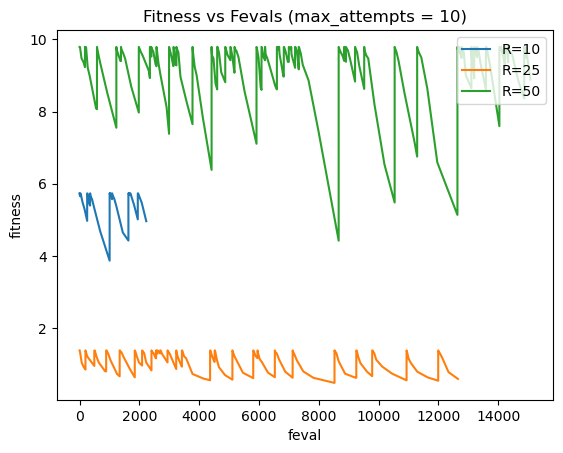

In [195]:
fig, ax = plt.subplots()
xlabels = ["R="+str(x) for x in restart_list]

ax.plot(rhc_runs1[0][1]["FEvals"].values.tolist(), 
        rhc_runs1[0][1]["Fitness"].values.tolist(),
        label= xlabels[0])

ax.plot(rhc_runs1[1][2]["FEvals"].values.tolist(), 
        rhc_runs1[1][2]["Fitness"].values.tolist(),
        label= xlabels[1])

ax.plot(rhc_runs1[2][0]["FEvals"].values.tolist(), 
        rhc_runs1[2][0]["Fitness"].values.tolist(),
        label= xlabels[2])

plt.legend(loc="upper right")
plt.title("Fitness vs Fevals (max_attempts = 10)")
plt.xlabel("feval")
plt.ylabel("fitness")

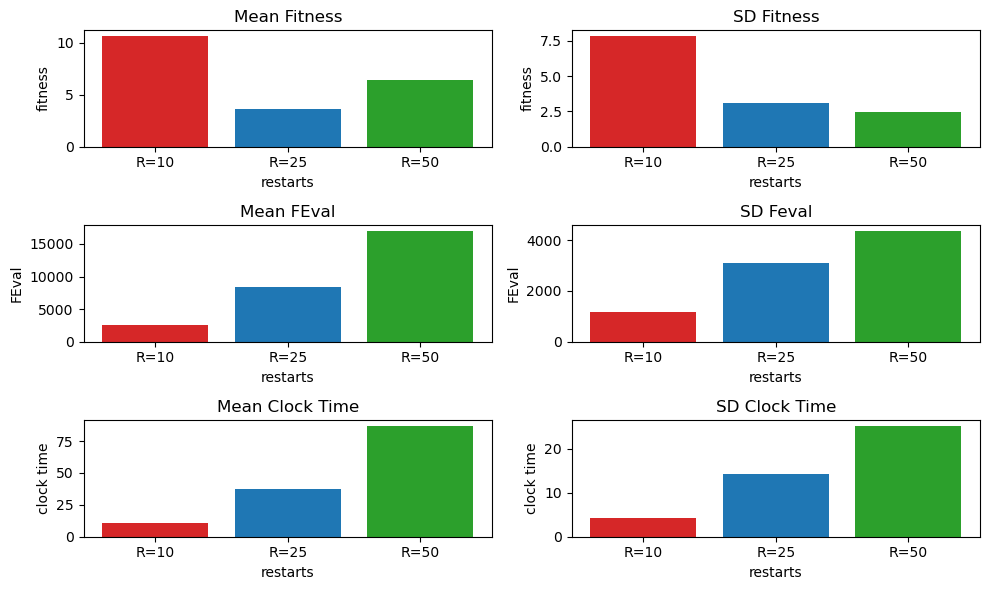

In [122]:
# RHC run plots
fig, axs = plt.subplots(3, 2,figsize=(10,6))
axs[0,0].set_title('Mean Fitness')
axs[0,1].set_title('SD Fitness')
axs[1,0].set_title('Mean FEval')
axs[1,1].set_title('SD Feval')
axs[2,0].set_title('Mean Clock Time')
axs[2,1].set_title('SD Clock Time')

x_vals = ["R="+str(x) for x in restart_list]
xlabels = ["R="+str(x) for x in restart_list]
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']


axs[0,0].bar(x_vals, [fitness_mean(rhc_runs1[i]) for i in range(len(rhc_runs1))], color=bar_colors)
axs[0,0].set_xlabel("restarts")
axs[0,0].set_ylabel("fitness")

axs[0,1].bar(x_vals, [fitness_std(rhc_runs1[i]) for i in range(len(rhc_runs1))], color=bar_colors)
axs[0,1].set_xlabel("restarts")
axs[0,1].set_ylabel("fitness")

axs[1,0].bar(x_vals, [feval_mean(rhc_runs1[i]) for i in range(len(rhc_runs1))], color=bar_colors)
axs[1,0].set_xlabel("restarts")
axs[1,0].set_ylabel("FEval")

axs[1,1].bar(x_vals, [feval_std(rhc_runs1[i]) for i in range(len(rhc_runs1))], color=bar_colors)
axs[1,1].set_xlabel("restarts")
axs[1,1].set_ylabel("FEval")

axs[2,0].bar(x_vals, [time_mean(rhc_runs1[i]) for i in range(len(rhc_runs1))], color=bar_colors)
axs[2,0].set_xlabel("restarts")
axs[2,0].set_ylabel("clock time")

axs[2,1].bar(x_vals, [time_std(rhc_runs1[i]) for i in range(len(rhc_runs1))], color=bar_colors)
axs[2,1].set_xlabel("restarts")
axs[2,1].set_ylabel("clock time")

plt.tight_layout()
plt.show()

Text(0, 0.5, 'fitness')

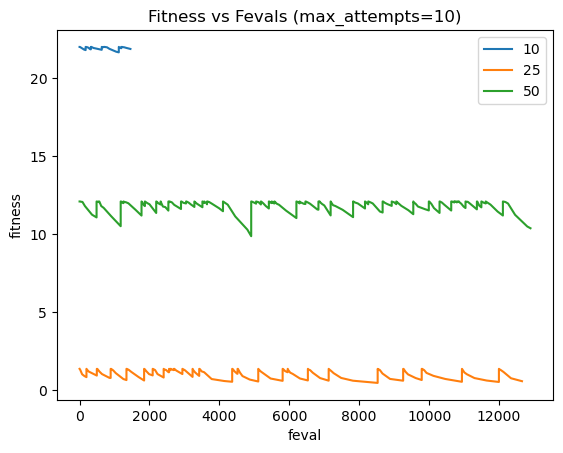

In [82]:
fig, ax = plt.subplots()
xlabels = ["10", "25", "50"]

for i in range(len(rhc_runs1)):
    ax.plot(rhc_runs1[i][2]["FEvals"].values.tolist(), 
            rhc_runs1[i][2]["Fitness"].values.tolist(),
           label= xlabels[i])

plt.legend(loc="upper right")
plt.title("Fitness vs Fevals (max_attempts=10)")
plt.xlabel("feval")
plt.ylabel("fitness")

In [84]:
# RHC
# test for restarts = [10,25,50]
# max attempts = 50

restart_list = [10,25,50]
rhc_runs2 = [[] for i in range(len(restart_list))]
rhc_curves2 = [[] for i in range(len(restart_list))]
rhc_test2 = [[] for i in range(len(restart_list))]


for i in range(3):  
    for k in range(len(restart_list)):
        grid_search_parameters = {
            'max_iters': [1000],                          # nn params
            'learning_rate': [1e-3],                       # nn params
            'activation': [mlrose_hiive.relu],            # nn params
            'restarts': [restart_list[k]],                             # rhc params
        }   

        nnr1 = NNGSRunner(
            x_train=X_train_scaled,
            y_train=y_train_hot,
            x_test=X_test_scaled,
            y_test=y_test_hot,
            experiment_name='nn_test_rhc',
            algorithm=mlrose_hiive.algorithms.rhc.random_hill_climb,
            grid_search_parameters=grid_search_parameters,
            iteration_list=[1, 10, 50, 100, 250, 500, 1000],
            hidden_layer_sizes=[[100,100]],
            bias=True,
            early_stopping=True,
            clip_max=1e+10,
            max_attempts=50,
            n_jobs=5,
            seed=np.random.randint(0,1000),
            output_directory=None
        )


        run_stats_df, curves_df, cv_results_df, grid_search_cv = nnr1.run()
        rhc_runs2[k].append(run_stats_df)
        rhc_curves2[k].append(curves_df)
        y_test_pred = grid_search_cv.predict(X_test_scaled)
        y_test_accuracy = accuracy_score(np.asarray(y_test_hot), np.asarray(y_test_pred))
        rhc_test2[k].append(y_test_accuracy)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


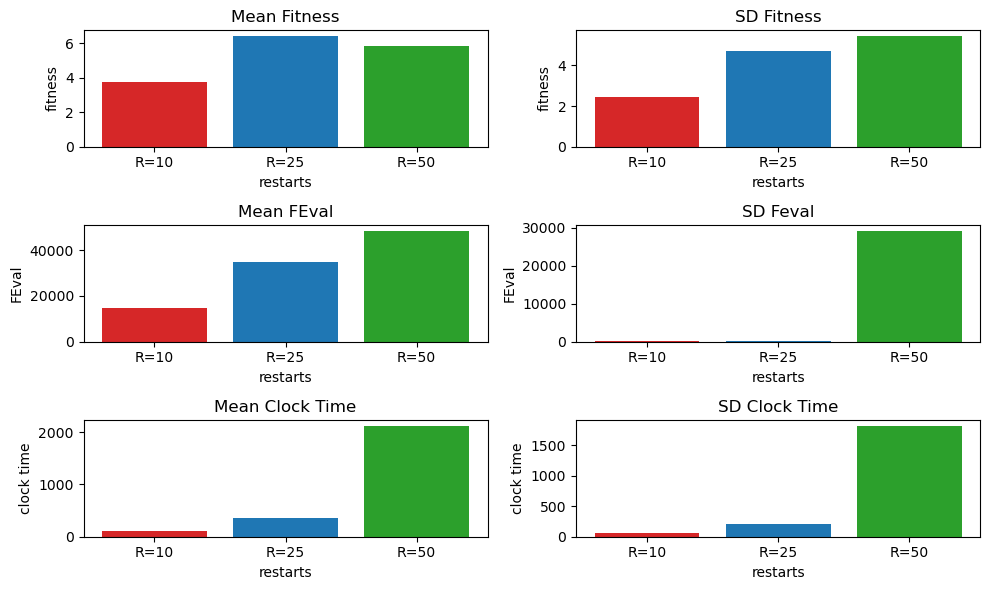

In [123]:
# RHC2 run plots
fig, axs = plt.subplots(3, 2,figsize=(10,6))
axs[0,0].set_title('Mean Fitness')
axs[0,1].set_title('SD Fitness')
axs[1,0].set_title('Mean FEval')
axs[1,1].set_title('SD Feval')
axs[2,0].set_title('Mean Clock Time')
axs[2,1].set_title('SD Clock Time')

x_vals = ["R="+str(x) for x in restart_list]
xlabels = ["R="+str(x) for x in restart_list]
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']


axs[0,0].bar(x_vals, [fitness_mean(rhc_runs2[i]) for i in range(len(rhc_runs2))], color=bar_colors)
axs[0,0].set_xlabel("restarts")
axs[0,0].set_ylabel("fitness")

axs[0,1].bar(x_vals, [fitness_std(rhc_runs2[i]) for i in range(len(rhc_runs2))], color=bar_colors)
axs[0,1].set_xlabel("restarts")
axs[0,1].set_ylabel("fitness")

axs[1,0].bar(x_vals, [feval_mean(rhc_runs2[i]) for i in range(len(rhc_runs2))], color=bar_colors)
axs[1,0].set_xlabel("restarts")
axs[1,0].set_ylabel("FEval")

axs[1,1].bar(x_vals, [feval_std(rhc_runs2[i]) for i in range(len(rhc_runs2))], color=bar_colors)
axs[1,1].set_xlabel("restarts")
axs[1,1].set_ylabel("FEval")

axs[2,0].bar(x_vals, [time_mean(rhc_runs2[i]) for i in range(len(rhc_runs2))], color=bar_colors)
axs[2,0].set_xlabel("restarts")
axs[2,0].set_ylabel("clock time")

axs[2,1].bar(x_vals, [time_std(rhc_runs2[i]) for i in range(len(rhc_runs2))], color=bar_colors)
axs[2,1].set_xlabel("restarts")
axs[2,1].set_ylabel("clock time")

plt.tight_layout()
plt.show()

Text(0, 0.5, 'fitness')

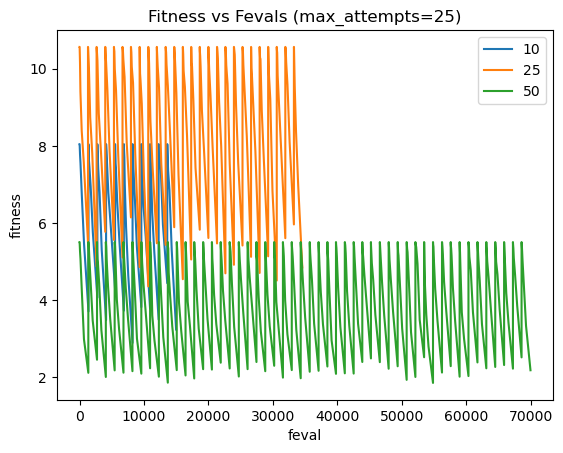

In [121]:
fig, ax = plt.subplots()
xlabels = ["10", "25", "50"]

for i in range(len(rhc_runs2)):
    ax.plot(rhc_runs2[i][1]["FEvals"].values.tolist(), 
            rhc_runs2[i][1]["Fitness"].values.tolist(),
           label= xlabels[i])


plt.legend(loc="upper right")
plt.title("Fitness vs Fevals (max_attempts=25)")
plt.xlabel("feval")
plt.ylabel("fitness")

In [8]:
# simulated_annealing

# test for temp schedules using geometric decay schedule

init_temps = [1,100,1000]
satemp_runs = [[] for i in range(len(init_temps))]
satemp_curves = [[] for i in range(len(init_temps))]
satemp_test = [[] for i in range(len(init_temps))]


for i in range(3):  
    for k in range(len(init_temps)):
        grid_search_parameters1 = {
            'max_iters': [1000],                          # nn params
            'learning_rate': [1e-3],                       # nn params
            'activation': [mlrose_hiive.relu],            # nn params
            'schedule': [mlrose_hiive.GeomDecay(init_temp=init_temps[k], decay=0.99, min_temp=0.001)]                             # rhc params
        }

        nnr1 = NNGSRunner(
            x_train=X_train_scaled,
            y_train=y_train_hot,
            x_test=X_test_scaled,
            y_test=y_test_hot,
            experiment_name='nn_test_rhc',
            algorithm=mlrose_hiive.algorithms.sa.simulated_annealing,
            grid_search_parameters=grid_search_parameters1,
            iteration_list=[1, 10, 50, 100, 250, 500, 1000],
            hidden_layer_sizes=[[100,100]],
            bias=True,
            early_stopping=True,
            clip_max=1e+10,
            max_attempts=20,
            n_jobs=5,
            seed=np.random.randint(0,1000),
            output_directory=None
        )

        run_stats_df, curves_df, cv_results_df, grid_search_cv = nnr1.run()
        satemp_runs[k].append(run_stats_df)
        satemp_curves[k].append(curves_df)
        y_test_pred = grid_search_cv.predict(X_test_scaled)
        y_test_accuracy = accuracy_score(np.asarray(y_test_hot), np.asarray(y_test_pred))
        satemp_test[k].append(y_test_accuracy)
    

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [170]:
sadecay_test[3]

[0.35964912280701755, 0.3684210526315789, 0.35964912280701755]

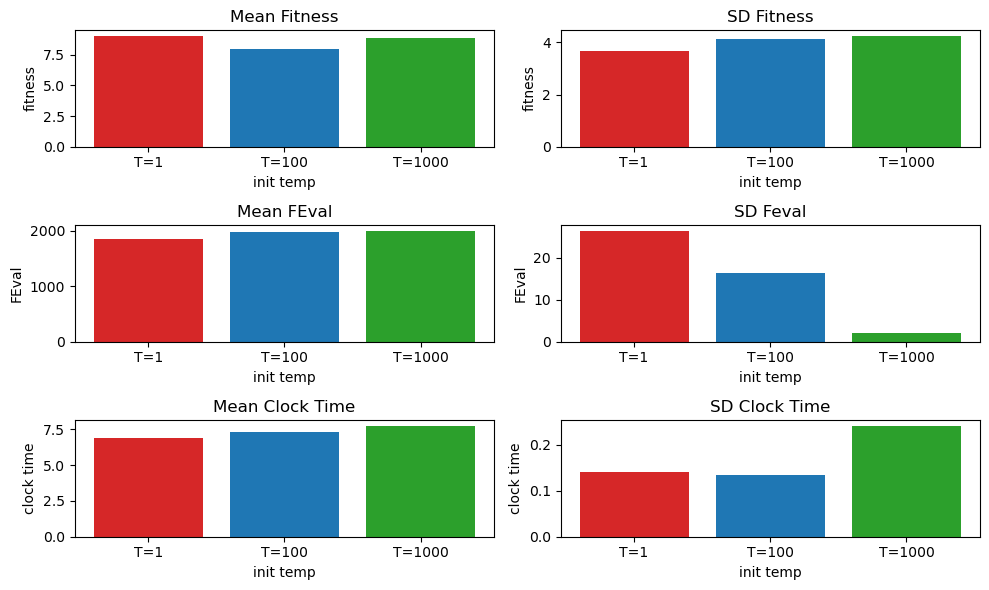

In [75]:
# SA temp plots
fig, axs = plt.subplots(3, 2,figsize=(10,6))
axs[0,0].set_title('Mean Fitness')
axs[0,1].set_title('SD Fitness')
axs[1,0].set_title('Mean FEval')
axs[1,1].set_title('SD Feval')
axs[2,0].set_title('Mean Clock Time')
axs[2,1].set_title('SD Clock Time')

x_vals = ["T="+str(x) for x in init_temps]
xlabels = ["T="+str(x) for x in init_temps]
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']


axs[0,0].bar(x_vals, [fitness_mean(satemp_runs[i]) for i in range(len(satemp_runs))], color=bar_colors)
axs[0,0].set_xlabel("init temp")
axs[0,0].set_ylabel("fitness")

axs[0,1].bar(x_vals, [fitness_std(satemp_runs[i]) for i in range(len(satemp_runs))], color=bar_colors)
axs[0,1].set_xlabel("init temp")
axs[0,1].set_ylabel("fitness")

axs[1,0].bar(x_vals, [feval_mean(satemp_runs[i]) for i in range(len(satemp_runs))], color=bar_colors)
axs[1,0].set_xlabel("init temp")
axs[1,0].set_ylabel("FEval")

axs[1,1].bar(x_vals, [feval_std(satemp_runs[i]) for i in range(len(satemp_runs))], color=bar_colors)
axs[1,1].set_xlabel("init temp")
axs[1,1].set_ylabel("FEval")

axs[2,0].bar(x_vals, [time_mean(satemp_runs[i]) for i in range(len(satemp_runs))], color=bar_colors)
axs[2,0].set_xlabel("init temp")
axs[2,0].set_ylabel("clock time")

axs[2,1].bar(x_vals, [time_std(satemp_runs[i]) for i in range(len(satemp_runs))], color=bar_colors)
axs[2,1].set_xlabel("init temp")
axs[2,1].set_ylabel("clock time")

plt.tight_layout()
plt.show()

In [171]:
# simulated_annealing

# testing decay schedules

decay_list = [
           {
            'max_iters': [1000],                          # nn params
            'learning_rate': [1e-3],                       # nn params
            'activation': [mlrose_hiive.relu],            # nn params
            'schedule': [mlrose_hiive.GeomDecay(init_temp=100, decay=0.8, min_temp=0.001)]                             # rhc params
        },
    
        {
            'max_iters': [1000],                          # nn params
            'learning_rate': [1e-3],                       # nn params
            'activation': [mlrose_hiive.relu],            # nn params
            'schedule': [mlrose_hiive.GeomDecay(init_temp=100, decay=0.5, min_temp=0.001)]                             # rhc params
        },
    
        {
        'max_iters': [1000],                          # nn params
        'learning_rate': [1e-3],                       # nn params
        'activation': [mlrose_hiive.relu],            # nn params
         'schedule': [mlrose_hiive.ExpDecay(init_temp=100, exp_const=0.01, min_temp=0.001)] 
        },
    
         {
        'max_iters': [1000],                          # nn params
        'learning_rate': [1e-3],                       # nn params
        'activation': [mlrose_hiive.relu],            # nn params
         'schedule': [mlrose_hiive.ExpDecay(init_temp=100, exp_const= 0.005, min_temp=0.001)] 
        }
]

sadecay_runs = [[] for i in range(len(decay_list))]
sadecay_curves =  [[] for i in range(len(decay_list))]
sadecay_test =  [[] for i in range(len(decay_list))]


for i in range(3):  
    for k in range(len(decay_list)):
        grid_search_parameters = decay_list[k]

        nnr1 = NNGSRunner(
            x_train=X_train_scaled,
            y_train=y_train_hot,
            x_test=X_test_scaled,
            y_test=y_test_hot,
            experiment_name='nn_test_rhc',
            algorithm=mlrose_hiive.algorithms.sa.simulated_annealing,
            grid_search_parameters=grid_search_parameters,
            iteration_list=[1, 10, 50, 100, 250, 500, 1000],
            hidden_layer_sizes=[[100,100]],
            bias=True,
            early_stopping=True,
            clip_max=1e+10,
            max_attempts=20,
            n_jobs=5,
            seed=np.random.randint(0,1000),
            output_directory=None
        )

        run_stats_df, curves_df, cv_results_df, grid_search_cv = nnr1.run()
        sadecay_runs[k].append(run_stats_df)
        sadecay_curves[k].append(curves_df)
        y_test_pred = grid_search_cv.predict(X_test_scaled)
        y_test_accuracy = accuracy_score(np.asarray(y_test_hot), np.asarray(y_test_pred))
        sadecay_test[k].append(y_test_accuracy)
    

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [163]:
sadecay_test [3]

[0.35964912280701755, 0.3684210526315789, 0.35964912280701755]

Text(0, 0.5, 'fitness')

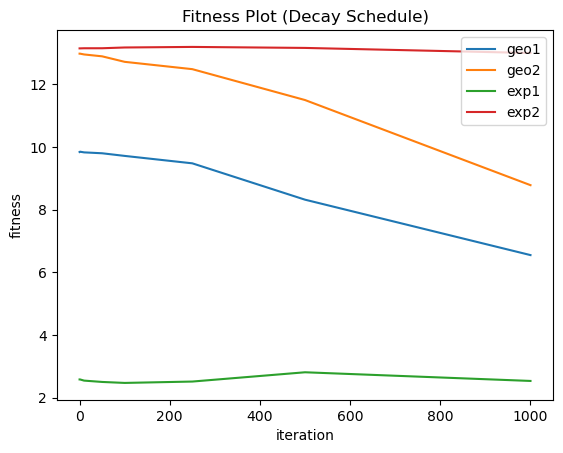

In [199]:
fig, ax = plt.subplots()
xlabels = ["geo1", "geo2", "exp1", "exp2"]

for i in range(len(sadecay_runs)):
    ax.plot(sadecay_runs[i][2]["Iteration"].values.tolist(), 
            sadecay_runs[i][2]["Fitness"].values.tolist(),
           label= xlabels[i])

plt.legend(loc="upper right")
plt.title("Fitness Plot (Decay Schedule)")
plt.xlabel("iteration")
plt.ylabel("fitness")

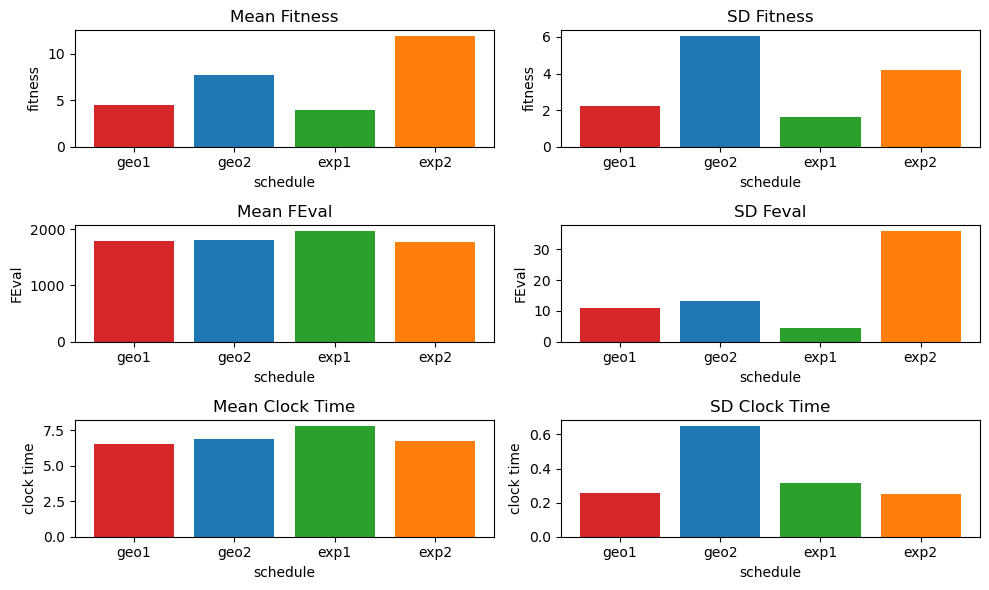

In [65]:
# GA popsz stats plot
fig, axs = plt.subplots(3, 2,figsize=(10,6))
axs[0,0].set_title('Mean Fitness')
axs[0,1].set_title('SD Fitness')
axs[1,0].set_title('Mean FEval')
axs[1,1].set_title('SD Feval')
axs[2,0].set_title('Mean Clock Time')
axs[2,1].set_title('SD Clock Time')

x_vals = ["geo1", "geo2", "exp1", "exp2"]
xlabels = ["geo1", "geo2", "exp1", "exp2"]
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']


axs[0,0].bar(x_vals, [fitness_mean(sadecay_runs[i]) for i in range(len(sadecay_runs))], color=bar_colors)
axs[0,0].set_xlabel("schedule")
axs[0,0].set_ylabel("fitness")

axs[0,1].bar(x_vals, [fitness_std(sadecay_runs[i]) for i in range(len(sadecay_runs))], color=bar_colors)
axs[0,1].set_xlabel("schedule")
axs[0,1].set_ylabel("fitness")

axs[1,0].bar(x_vals, [feval_mean(sadecay_runs[i]) for i in range(len(sadecay_runs))], color=bar_colors)
axs[1,0].set_xlabel("schedule")
axs[1,0].set_ylabel("FEval")

axs[1,1].bar(x_vals, [feval_std(sadecay_runs[i]) for i in range(len(sadecay_runs))], color=bar_colors)
axs[1,1].set_xlabel("schedule")
axs[1,1].set_ylabel("FEval")

axs[2,0].bar(x_vals, [time_mean(sadecay_runs[i]) for i in range(len(sadecay_runs))], color=bar_colors)
axs[2,0].set_xlabel("schedule")
axs[2,0].set_ylabel("clock time")

axs[2,1].bar(x_vals, [time_std(sadecay_runs[i]) for i in range(len(sadecay_runs))], color=bar_colors)
axs[2,1].set_xlabel("schedule")
axs[2,1].set_ylabel("clock time")

plt.tight_layout()
plt.show()

In [11]:
# genetic_alg

# test pop size

pop_sz = [10,100,1000]
gapop_runs = [[] for i in range(len(pop_sz))]
gapop_curves = [[] for i in range(len(pop_sz))]
gapop_test = [[] for i in range(len(pop_sz))]



for i in range(3):  
    for k in range(len(pop_sz)):
        grid_search_parameters = {
            'max_iters': [1000],                          # nn params
            'learning_rate': [1e-3],                       # nn params
            'activation': [mlrose_hiive.relu],            # nn params
            'pop_size': [pop_sz[k]]                             #ga params
        }


        nnr1 = NNGSRunner(
            x_train=X_train_scaled,
            y_train=y_train_hot,
            x_test=X_test_scaled,
            y_test=y_test_hot,
            experiment_name='nn_test_rhc',
            algorithm=mlrose_hiive.algorithms.ga.genetic_alg,
            grid_search_parameters=grid_search_parameters,
            iteration_list=[1, 10, 50, 100, 250, 500, 1000],
            hidden_layer_sizes=[[100,100]],
            bias=True,
            early_stopping=True,
            clip_max=1e+10,
            max_attempts=20,
            n_jobs=5,
            seed=np.random.randint(0,1000),
            output_directory=None
        )

        run_stats_df, curves_df, cv_results_df, grid_search_cv = nnr1.run()
        gapop_runs[k].append(run_stats_df)
        gapop_curves[k].append(curves_df)
        y_test_pred = grid_search_cv.predict(X_test_scaled)
        y_test_accuracy = accuracy_score(np.asarray(y_test_hot), np.asarray(y_test_pred))
        gapop_test[k].append(y_test_accuracy)
    
   

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


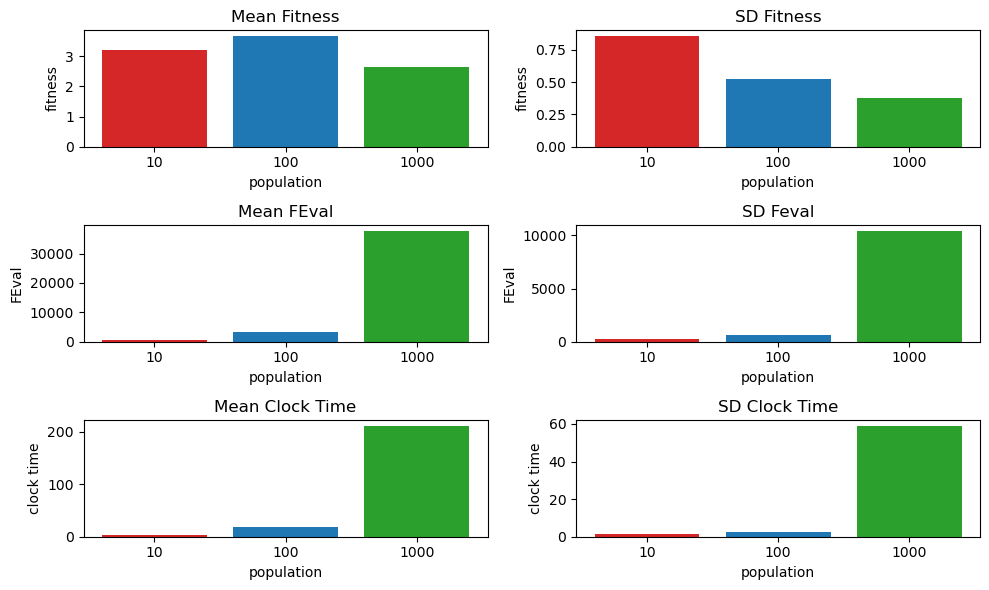

In [62]:
# GA popsz stats plot
fig, axs = plt.subplots(3, 2,figsize=(10,6))
axs[0,0].set_title('Mean Fitness')
axs[0,1].set_title('SD Fitness')
axs[1,0].set_title('Mean FEval')
axs[1,1].set_title('SD Feval')
axs[2,0].set_title('Mean Clock Time')
axs[2,1].set_title('SD Clock Time')

x_vals = [str(x) for x in pop_sz]
xlabels = ["P="+str(x) for x in pop_sz]
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']


axs[0,0].bar(x_vals, [fitness_mean(gapop_runs[i]) for i in range(len(gapop_runs))], color=bar_colors)
axs[0,0].set_xlabel("population")
axs[0,0].set_ylabel("fitness")

axs[0,1].bar(x_vals, [fitness_std(gapop_runs[i]) for i in range(len(gapop_runs))], color=bar_colors)
axs[0,1].set_xlabel("population")
axs[0,1].set_ylabel("fitness")

axs[1,0].bar(x_vals, [feval_mean(gapop_runs[i]) for i in range(len(gapop_runs))], color=bar_colors)
axs[1,0].set_xlabel("population")
axs[1,0].set_ylabel("FEval")

axs[1,1].bar(x_vals, [feval_std(gapop_runs[i]) for i in range(len(gapop_runs))], color=bar_colors)
axs[1,1].set_xlabel("population")
axs[1,1].set_ylabel("FEval")

axs[2,0].bar(x_vals, [time_mean(gapop_runs[i]) for i in range(len(gapop_runs))], color=bar_colors)
axs[2,0].set_xlabel("population")
axs[2,0].set_ylabel("clock time")

axs[2,1].bar(x_vals, [time_std(gapop_runs[i]) for i in range(len(gapop_runs))], color=bar_colors)
axs[2,1].set_xlabel("population")
axs[2,1].set_ylabel("clock time")

plt.tight_layout()
plt.show()

Text(0, 0.5, 'fitness')

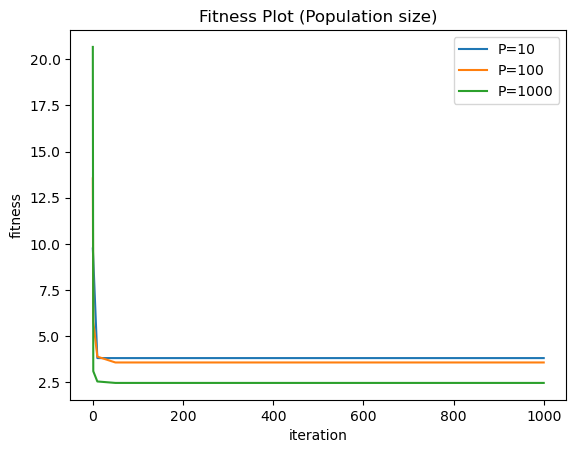

In [200]:
fig, ax = plt.subplots()
xlabels = ["P="+str(x) for x in pop_sz]

for i in range(len(pop_sz)):
    ax.plot(gapop_runs[i][0]["Iteration"].values.tolist(), 
            gapop_runs[i][0]["Fitness"].values.tolist(),
           label= xlabels[i])

plt.legend(loc="upper right")
plt.title("Fitness Plot (Population size)")
plt.xlabel("iteration")
plt.ylabel("fitness")

In [32]:
# genetic_alg

# test mutation rate

mt_rate = [.01, .1, .5, .9]
gamt_runs = [[] for i in range(len(mt_rate))]
gamt_curves = [[] for i in range(len(mt_rate))]
gamt_test = [[] for i in range(len(mt_rate))]



for i in range(3):  
    for k in range(len(mt_rate)):
        grid_search_parameters = {
            'max_iters': [1000],                          # nn params
            'learning_rate': [1e-3],                       # nn params
            'activation': [mlrose_hiive.relu],            # nn params
            'pop_size': [200],                            #ga params
            'mutation_prob': [mt_rate[k]]
        }

        nnr1 = NNGSRunner(
            x_train=X_train_scaled,
            y_train=y_train_hot,
            x_test=X_test_scaled,
            y_test=y_test_hot,
            experiment_name='nn_test_rhc',
            algorithm=mlrose_hiive.algorithms.ga.genetic_alg,
            grid_search_parameters=grid_search_parameters,
            iteration_list=[1, 10, 50, 100, 250, 500, 1000],
            hidden_layer_sizes=[[100,100]],
            bias=True,
            early_stopping=True,
            clip_max=1e+10,
            max_attempts=20,
            n_jobs=5,
            seed=np.random.randint(0,1000),
            output_directory=None
        )

        run_stats_df, curves_df, cv_results_df, grid_search_cv = nnr1.run()
        gamt_runs[k].append(run_stats_df)
        gamt_curves[k].append(curves_df)
        y_test_pred = grid_search_cv.predict(X_test_scaled)
        y_test_accuracy = accuracy_score(np.asarray(y_test_hot), np.asarray(y_test_pred))
        gamt_test[k].append(y_test_accuracy)
    
   

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [184]:
print(gamt_test[3])
HTML(gamt_runs[0][2][['Iteration', 'Fitness', 'FEvals', 'Time']].to_html())

[0.8771929824561403, 0.9210526315789473, 0.9385964912280702]


,Iteration,Fitness,FEvals,Time
0,0,24.002697,201,0.812863
1,1,4.911443,403,1.583715
2,10,2.534938,2213,8.511177
3,50,1.742770,10257,40.313112
4,100,1.188252,14882,58.370949
5,250,1.188252,14882,58.370949
6,500,1.188252,14882,58.370949
7,1000,1.188252,14882,58.370949


In [38]:
x1= gamt_runs[0][0]["FEvals"].values.tolist()
y1=gamt_runs[0][0]["Fitness"].values.tolist()

In [49]:
gamt_runs[0]

[   Iteration    Fitness  FEvals       Time  \
 0          0  21.071674     201   0.719876   
 1          1   6.337346     403   1.539202   
 2         10   3.406323    2215   9.422374   
 3         50   2.534938    9455  38.486483   
 4        100   2.534938    9455  38.486483   
 5        250   2.534938    9455  38.486483   
 6        500   2.534938    9455  38.486483   
 7       1000   2.534938    9455  38.486483   
 
                                                State  max_iters  \
 0  [520568521.6829529, 3706343701.6735, 671348376...       1000   
 1  [5571683436.415602, -9303344383.531471, 453797...       1000   
 2  [-9563026711.27645, -5469510136.724431, -71673...       1000   
 3  [8030670650.023594, 5409461649.251738, -802527...       1000   
 4  [8030670650.023594, 5409461649.251738, -802527...       1000   
 5  [8030670650.023594, 5409461649.251738, -802527...       1000   
 6  [8030670650.023594, 5409461649.251738, -802527...       1000   
 7  [8030670650.023594, 5409461

Text(0, 0.5, 'fitness')

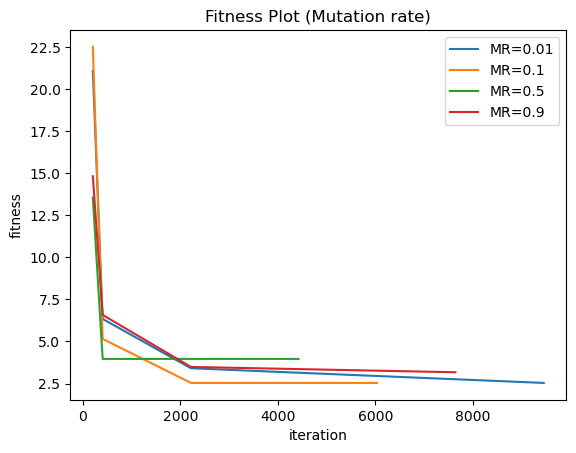

In [201]:
fig, ax = plt.subplots()
xlabels = ["MR="+str(x) for x in mt_rate]

for i in range(len(mt_rate)):
    ax.plot(gamt_runs[i][0]["FEvals"].values.tolist(), 
            gamt_runs[i][0]["Fitness"].values.tolist(),
           label= xlabels[i])

plt.legend(loc="upper right")
plt.title("Fitness Plot (Mutation rate)")
plt.xlabel("iteration")
plt.ylabel("fitness")

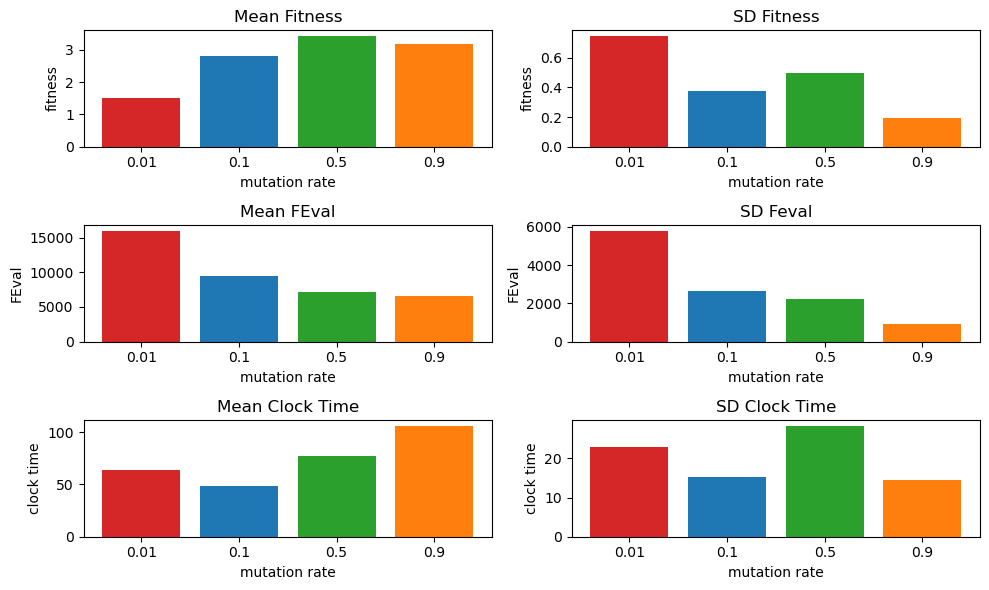

In [59]:
# GA mutation stats plot
fig, axs = plt.subplots(3, 2,figsize=(10,6))
axs[0,0].set_title('Mean Fitness')
axs[0,1].set_title('SD Fitness')
axs[1,0].set_title('Mean FEval')
axs[1,1].set_title('SD Feval')
axs[2,0].set_title('Mean Clock Time')
axs[2,1].set_title('SD Clock Time')

x_vals = [str(x) for x in mt_rate]
xlabels = ["MR="+str(x) for x in mt_rate]
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']


axs[0,0].bar(x_vals, [fitness_mean(gamt_runs[i]) for i in range(len(gamt_runs))], color=bar_colors)
axs[0,0].set_xlabel("mutation rate")
axs[0,0].set_ylabel("fitness")

axs[0,1].bar(x_vals, [fitness_std(gamt_runs[i]) for i in range(len(gamt_runs))], color=bar_colors)
axs[0,1].set_xlabel("mutation rate")
axs[0,1].set_ylabel("fitness")

axs[1,0].bar(x_vals, [feval_mean(gamt_runs[i]) for i in range(len(gamt_runs))], color=bar_colors)
axs[1,0].set_xlabel("mutation rate")
axs[1,0].set_ylabel("FEval")

axs[1,1].bar(x_vals, [feval_std(gamt_runs[i]) for i in range(len(gamt_runs))], color=bar_colors)
axs[1,1].set_xlabel("mutation rate")
axs[1,1].set_ylabel("FEval")

axs[2,0].bar(x_vals, [time_mean(gamt_runs[i]) for i in range(len(gamt_runs))], color=bar_colors)
axs[2,0].set_xlabel("mutation rate")
axs[2,0].set_ylabel("clock time")

axs[2,1].bar(x_vals, [time_std(gamt_runs[i]) for i in range(len(gamt_runs))], color=bar_colors)
axs[2,1].set_xlabel("mutation rate")
axs[2,1].set_ylabel("clock time")

plt.tight_layout()
plt.show()

In [151]:
len(rhc_runs2[2])

3

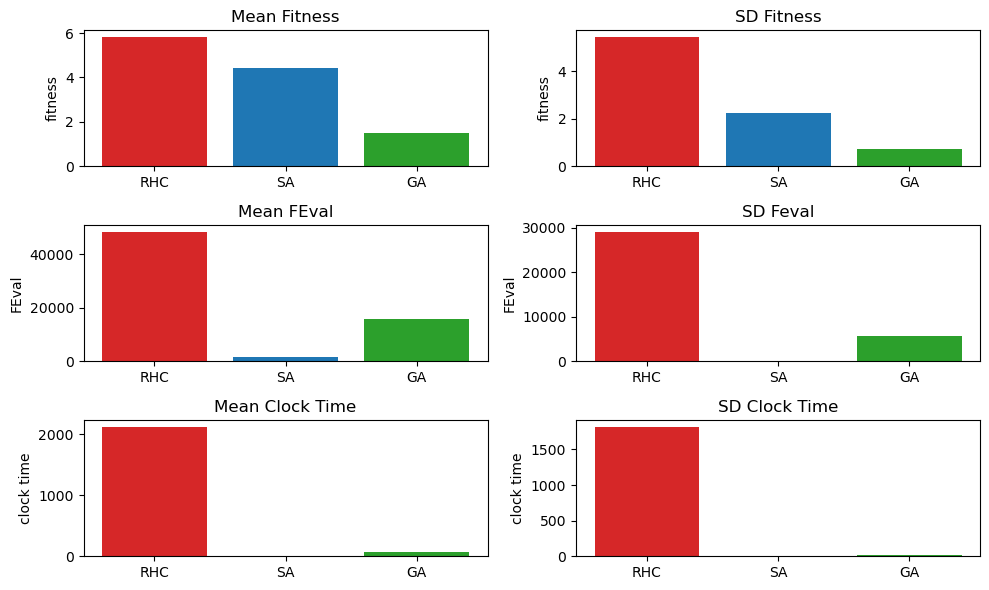

In [152]:
best_runs = [rhc_runs2[2],sadecay_runs[0], gamt_runs[0]]

# Comparison plots

fig, axs = plt.subplots(3, 2,figsize=(10,6))
axs[0,0].set_title('Mean Fitness')
axs[0,1].set_title('SD Fitness')
axs[1,0].set_title('Mean FEval')
axs[1,1].set_title('SD Feval')
axs[2,0].set_title('Mean Clock Time')
axs[2,1].set_title('SD Clock Time')

x_vals = ["RHC", "SA", "GA"]
xlabels = ["RHC", "SA", "GA"]
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']


axs[0,0].bar(x_vals, [fitness_mean(best_runs[i]) for i in range(len(best_runs))], color=bar_colors)
axs[0,0].set_ylabel("fitness")

axs[0,1].bar(x_vals, [fitness_std(best_runs[i]) for i in range(len(best_runs))], color=bar_colors)
axs[0,1].set_ylabel("fitness")

axs[1,0].bar(x_vals, [feval_mean(best_runs[i]) for i in range(len(best_runs))], color=bar_colors)
axs[1,0].set_ylabel("FEval")

axs[1,1].bar(x_vals, [feval_std(best_runs[i]) for i in range(len(best_runs))], color=bar_colors)
axs[1,1].set_ylabel("FEval")

axs[2,0].bar(x_vals, [time_mean(best_runs[i]) for i in range(len(best_runs))], color=bar_colors)
axs[2,0].set_ylabel("clock time")

axs[2,1].bar(x_vals, [time_std(best_runs[i]) for i in range(len(best_runs))], color=bar_colors)
axs[2,1].set_ylabel("clock time")

plt.tight_layout()
plt.show()

Text(0, 0.5, 'accuracy')

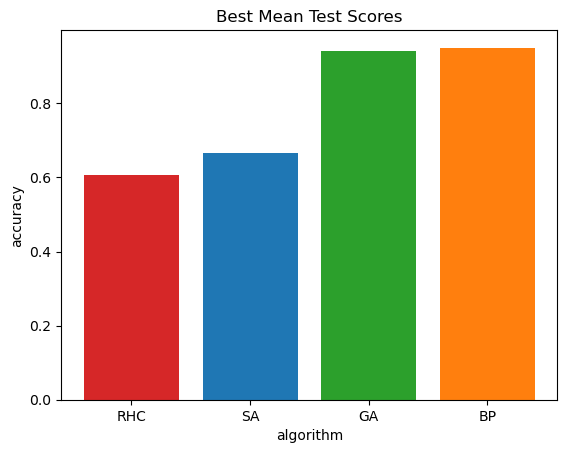

In [204]:
best_test = [np.mean(rhc_test2[2]), np.mean(sadecay_test[0]), np.mean(gamt_test[0]), .95]

fig, ax = plt.subplots()
x_vals = ["RHC", "SA", "GA", "BP"]
xlabels = ["RHC", "SA", "GA", "BP"]
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(x_vals, 
        best_test,
        color= bar_colors)

plt.title("Best Mean Test Scores")
plt.xlabel("algorithm")
plt.ylabel("accuracy")

In [192]:
print(time_mean(sadecay_runs[0]))
print(time_mean(rhc_runs2[2]))
print(time_mean(gamt_runs[0]))

18.033858899997238
2119.8099343000017
63.550868999998784
